In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import zipfile


# import seaborn as sns
# sns.set()

# #Make sure to pip install monkeylearn first
# from monkeylearn import MonkeyLearn
from textblob import TextBlob
import re

In [2]:
tweets = pd.read_csv('data/TrumpTweetsCleaned.csv')
#09-11-2017 to 02-16-2018
before = pd.to_datetime('2017-09-11')
after = pd.to_datetime('2018-02-16')
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
# new_tweets = tweets[(tweets['created_at']>=before) and (tweets['created_at']<=after)]
tweets.head()

,text,created_at,retweet_count,favorite_count,is_retweet
0,Look at the way Crooked Hillary is handling th...,2016-11-01 10:31:00,21459.0,55584.0,False
1,Wow now leading in @ABC /@washingtonpost Poll ...,2016-11-01 11:55:00,16479.0,39631.0,False
2,Crooked Hillary should not be allowed to run f...,2016-11-01 12:01:00,23747.0,59656.0,False
3,JOIN ME TOMORROW IN FLORIDA!MIAMI‚Ä¢12pmhttps:...,2016-11-01 13:35:00,8773.0,17583.0,False
4,So terrible that Crooked didn't report she got...,2016-11-01 14:14:00,32713.0,80724.0,False


In [3]:
tweets['polarity'] = [TextBlob(tweets['text'].values[i]).polarity for i in range(len(tweets))]
tweets['subjectivity'] = [TextBlob(tweets['text'].values[i]).subjectivity for i in range(len(tweets))]
tweets.head()

,text,created_at,retweet_count,favorite_count,is_retweet,polarity,subjectivity
0,Look at the way Crooked Hillary is handling th...,2016-11-01 10:31:00,21459.0,55584.0,False,-0.2625,0.422917
1,Wow now leading in @ABC /@washingtonpost Poll ...,2016-11-01 11:55:00,16479.0,39631.0,False,0.2000,0.533333
2,Crooked Hillary should not be allowed to run f...,2016-11-01 12:01:00,23747.0,59656.0,False,0.0000,0.100000
3,JOIN ME TOMORROW IN FLORIDA!MIAMI‚Ä¢12pmhttps:...,2016-11-01 13:35:00,8773.0,17583.0,False,0.0000,0.000000
4,So terrible that Crooked didn't report she got...,2016-11-01 14:14:00,32713.0,80724.0,False,-0.5000,0.550000


In [4]:
len(tweets[tweets['polarity']==0])/len(tweets)

0.19706092458414123

In [5]:
processed_features = []

for sentence in range(0, len(tweets['text'].values)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(tweets['text'].values[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [6]:
tweets['test'] = [TextBlob(processed_features[i]).polarity for i in range(len(processed_features))]
len(tweets[tweets['test']==0])/len(tweets)

0.19491784876007756

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


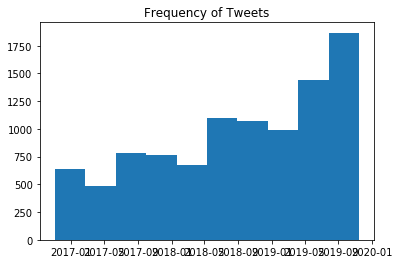

In [7]:
temp = plt.hist(tweets['created_at'])
plt.title('Frequency of Tweets')
plt.show()

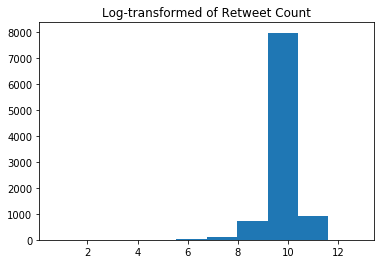

In [8]:
temp2 = plt.hist(np.log(tweets['retweet_count']))
plt.title('Log-transformed of Retweet Count')
plt.show()

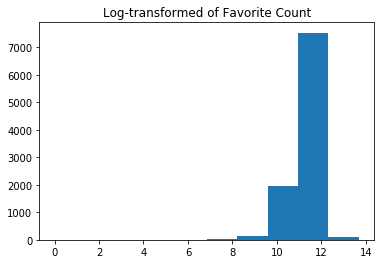

In [9]:
temp3 = plt.hist(np.log(tweets['favorite_count'] + 1))
plt.title('Log-transformed of Favorite Count')
plt.show()

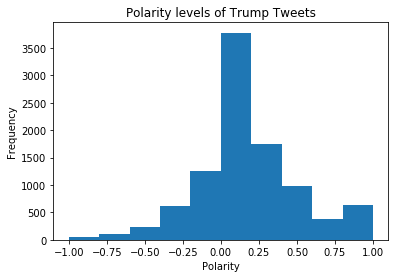

In [10]:
plt.hist(tweets['polarity'])
plt.title('Polarity levels of Trump Tweets')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

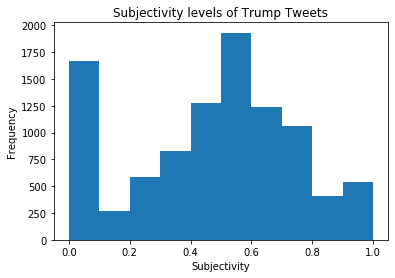

In [11]:
plt.hist(tweets['subjectivity'])
plt.title('Subjectivity levels of Trump Tweets')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

In [12]:
# tweets[(tweets['polarity']==0) & (tweets['subjectivity'] == 0)]

In [13]:
succ = []
for i in range(len(tweets)):
    phrase = tweets['text'].values[i].lower()
    word = 'china'
    if word in phrase:
        succ.append(1)
    else:
        succ.append(0)
tweets['china'] = succ
#tweets[tweets['china']==1]

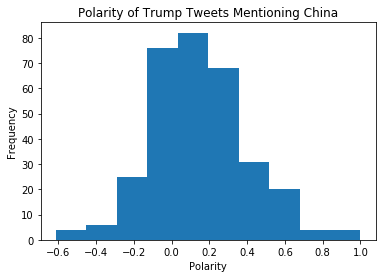

In [14]:
plt.hist(tweets[tweets['china']==1]['polarity'])
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Polarity of Trump Tweets Mentioning China')
plt.show()

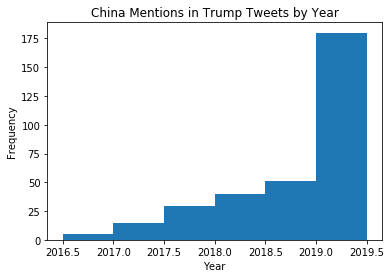

In [15]:
bins = [2016.5, 2017, 2017.5, 2018, 2018.5, 2019, 2019.5]
plt.hist(np.add([r.year for r in tweets[tweets['china']==1]['created_at']], [0.5 if r.week > 26 else 0 for r in tweets[tweets['china']==1]['created_at']]),bins=bins)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('China Mentions in Trump Tweets by Year')
plt.show()

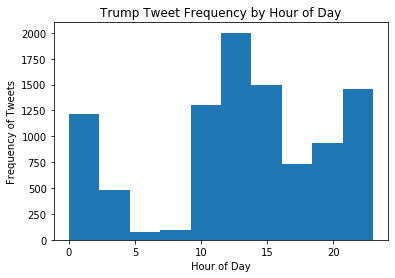

In [16]:
plt.hist([r.hour for r in tweets.created_at])
plt.xlabel('Hour of Day')
plt.ylabel('Frequency of Tweets')
plt.title('Trump Tweet Frequency by Hour of Day')
plt.show()

## Stock Data 

In [17]:
stock = pd.read_csv('data/SP500_intraday.csv')

In [18]:
tweet_dates = tweets['created_at']
tweet_dates.head()

0   2016-11-01 10:31:00
1   2016-11-01 11:55:00
2   2016-11-01 12:01:00
3   2016-11-01 13:35:00
4   2016-11-01 14:14:00
Name: created_at, dtype: datetime64[ns]

In [19]:
stock['Time_pd'] = pd.to_timedelta(stock['Time']+':00')
stock['Date_time'] = pd.to_datetime(pd.to_datetime(stock['Date'])+ pd.to_timedelta(stock['Time_pd']))

In [20]:
latest_time = stock['Date_time'].iloc[-1]
earliest_time = stock['Date_time'][0] 
tweets = tweets[(tweets['created_at'] > earliest_time) & (tweets['created_at'] < latest_time)]
tweets = tweets.reset_index(drop = True)

In [21]:
## Edit the minute after
time_min = 1
time_after = tweets['created_at'] + pd.to_timedelta(time_min, unit = 'm')
time_of = tweets['created_at']
good_time_after = sorted(list(set(stock['Date_time']) & set(time_after)))
x = np.arange(0,len(good_time_after))
tweets_stock_viable = tweets.iloc[np.concatenate([np.where(time_after == good_time_after[x])[0] for x in x])]

time_after2 = tweets_stock_viable['created_at'] + pd.to_timedelta(time_min, unit = 'm')
time_of2 = tweets_stock_viable['created_at']
x = time_of2



bad_var = [stock[stock['Date_time'] == time_of2[i]]['Open'].values
             for i in tweets_stock_viable.index]
bad = np.where(pd.DataFrame(bad_var, index = tweets_stock_viable.index).isna())[0]
tweets_stock_viable = tweets_stock_viable.drop(tweets_stock_viable.index[bad])
stock_df = [stock[stock['Date_time'] == time_after2[i]]['Close'].values - stock[stock['Date_time'] == time_of2[i]]['Open'].values
             for i in x.index]

In [22]:
# tweets_stock_viable = tweets_stock_viable.drop(tweets_stock_viable.index[bad])
# time_after3 = tweets_stock_viable['created_at'] + pd.to_timedelta(time_min, unit = 'm')
# time_of3 = tweets_stock_viable['created_at']
# x = time_of3
# stock_df = [stock[stock['Date_time'] == time_after3[i]]['Close'].values - stock[stock['Date_time'] == time_of3[i]]['Open'].values
#              for i in x.index]

In [23]:
tweets_stock_viable['stock_dif'] = pd.DataFrame(np.concatenate(stock_df), index= tweets_stock_viable.index)
length = len(tweets_stock_viable)
tweets_stock_viable['stock_up'] = [1 if tweets_stock_viable['stock_dif'][i] > 0 else 0 for i in tweets_stock_viable.index]

In [25]:
# Creating new feature variable - mentions of China in trump tweets
def add_indicator(keyword):
    succ = []
    for i in range(len(tweets_stock_viable)):
        phrase = tweets_stock_viable['text'].values[i].lower()
        word = keyword
        if word in phrase:
            succ.append(1)
        else:
            succ.append(0)
    tweets_stock_viable[keyword] = succ

add_indicator('china')
add_indicator('tariff')
add_indicator('farmer')
add_indicator('trade')
add_indicator('war')

len(tweets[tweets['trade']==1])

KeyError: 'trade'

# Final DF

In [ ]:
tweets_stock_viable.head()

In [ ]:
tweets_stock_viable.to_csv('data/tweets_stock_viable' )
delta_t = tweets_stock_viable.created_at[1:]-tweets_stock_viable.created_at[0:-1]

# Baseline Models

In [ ]:
#logistic regression

